In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


In [17]:
def gradient_method_quadratic(A, b, x0, epsilon=1e-5):
    """
    Parameters
    ----------
    A   the positive definite matrix associated with the objective function
    b   a column vector associated with the linear part of the objective function
    x0  starting point of the method 
    epsilon tolerance parameter
    """
    iter = 0
    x = x0.copy()
    x_collect = [x0.copy()]
    grad = 2 * (A @ x + b)
    while la.norm(grad) > epsilon:
        iter = iter + 1
        t = np.dot(grad, grad) / (2 * np.dot(grad, A @ grad))
        x = x - t * grad
        grad = 2 * (A @ x + b)
        func_val = np.dot(x, A @ x) + 2 * np.dot(b, x)
        print(f"{iter:02d}, {la.norm(grad):0.12f}, {func_val:0.8g}")
        x_collect.append(x)
    return np.array(x_collect)


In [18]:
A = np.array([[1, 0],
              [0, 2.]])


b = np.array([0, 0.0])

x0 = np.array([2, 1.0])

print("k   norm_gradient   function value")
x_collect = gradient_method_quadratic(A, b, x0)


k   norm_gradient   function value
01, 1.885618083164, 0.66666667
02, 0.628539361055, 0.074074074
03, 0.209513120352, 0.0082304527
04, 0.069837706784, 0.00091449474
05, 0.023279235595, 0.00010161053
06, 0.007759745198, 1.1290059e-05
07, 0.002586581733, 1.2544509e-06
08, 0.000862193911, 1.3938344e-07
09, 0.000287397970, 1.5487049e-08
10, 0.000095799323, 1.7207832e-09
11, 0.000031933108, 1.9119813e-10
12, 0.000010644369, 2.1244237e-11
13, 0.000003548123, 2.3604708e-12


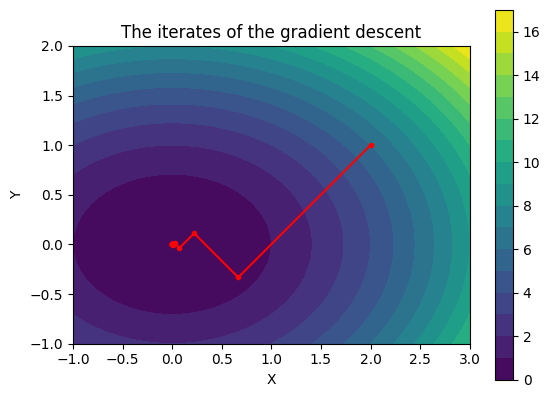

In [6]:
x = np.linspace(-1, 3)
y = np.linspace(-1, 2)
X, Y = np.meshgrid(x, y)

Z = X**2 * A[0, 0] + X * Y * (A[0, 1] + A[0, 1]) + Y**2 * A[1, 1]

plt.contourf(X, Y, Z, 20)
plt.title("The iterates of the gradient descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("scaled")
plt.plot(x_collect[:, 0], x_collect[:, 1], c='r', marker='.')
plt.colorbar()
